# Plots for van

## LO1: Algorithms

##### Quellen:
- https://seaborn.pydata.org/examples/anscombes_quartet.html

### Abb.1

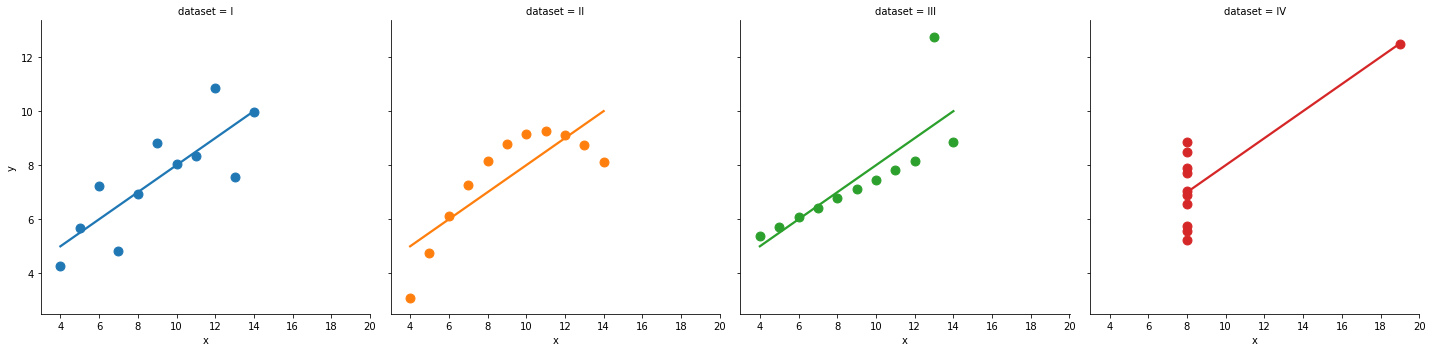

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=4, ci=None, height=5,
           scatter_kws={"s": 80, "alpha": 1})
plt.show()

### Abb.2

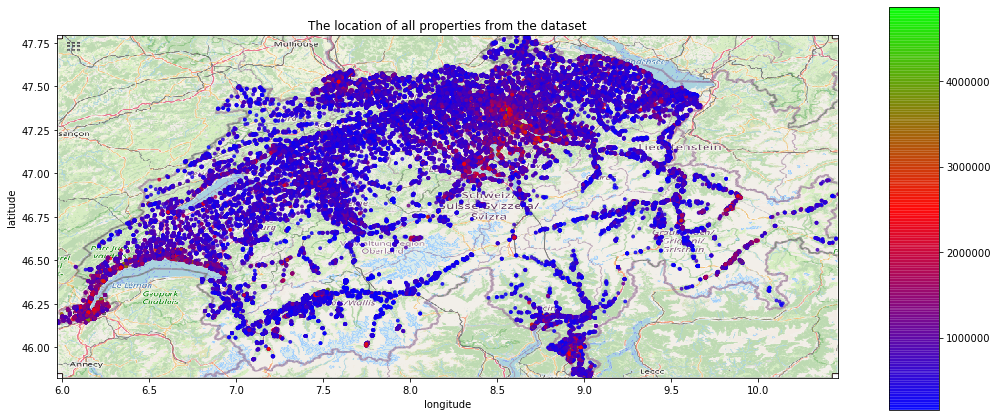

In [13]:
# Import the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data:
df = pd.read_csv('immo_dev_data.csv')
# Import the image:
swiss_map = plt.imread("Swiss_map.png")

box_range = ((df.Longitude.min(), df.Longitude.max(), df.Latitude.min(), df.Latitude.max()))

fig, ax = plt.subplots(figsize = (14,8))
im = ax.scatter(df.Longitude, df.Latitude, zorder=2, alpha= 0.8, c=df.PurchasePrice, cmap='brg', s=8)
ax.set_title('The location of all properties from the dataset')
ax.set_xlim(box_range[0],box_range[1])
ax.set_ylim(box_range[2],box_range[3])
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
cax = fig.add_axes([0.95, 0.15, 0.05, 0.7]) #position colorbar
ax.imshow(swiss_map, zorder=1, extent = box_range, aspect= 'equal')
fig.colorbar(im, cax=cax, ax=ax)
plt.show()

### Abb.3

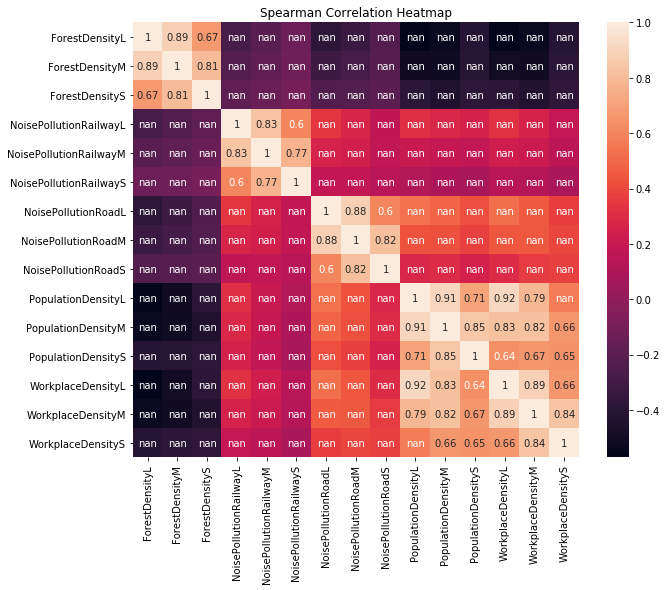

In [14]:
tmp = df[['ForestDensityL', 'ForestDensityM', 'ForestDensityS',
          'NoisePollutionRailwayL', 'NoisePollutionRailwayM','NoisePollutionRailwayS', 
          'NoisePollutionRoadL', 'NoisePollutionRoadM','NoisePollutionRoadS', 
          'PopulationDensityL', 'PopulationDensityM','PopulationDensityS',
         'WorkplaceDensityL', 'WorkplaceDensityM', 'WorkplaceDensityS']].corr(method='spearman')

fig, ax = plt.subplots(1,1, figsize=(10,8))
p = sns.heatmap(tmp, annot=tmp[tmp>0.6])
p.set_title('Spearman Correlation Heatmap')
plt.show()

del tmp

## LO2: Cognition and computation

##### Quellen:
- 

### Abb.5

R2 Score:  0.39401534903457014


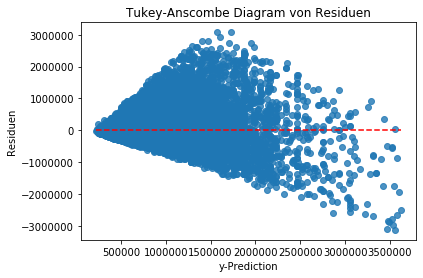

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Train test split of the input data. We chose a common ratio of 80/20.
X, y = df['AreaLiving'].values, df['PurchasePrice'].values
X_train, X_test, y_train, y_test =  train_test_split(X,y,  test_size=0.2)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

# Train the model with the splitted test data for X and y.
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the data with test data for X.
y_pred = model.predict(X_test)
model_1 = model.score(X_test, y_test)
# R2 SCore of the Model
print('R2 Score: ', model_1)

def residuals(y,prediction):
    residuen = y-prediction
    plt.scatter(x=prediction, y=residuen, alpha=0.8)
    plt.hlines(y=0, xmin=min(prediction), xmax=max(prediction), linestyles='--',color="r")
    plt.title('Tukey-Anscombe Diagram von Residuen')
    plt.xlabel('y-Prediction')
    plt.ylabel('Residuen')
    plt.show()
    
residuals(y_test,y_pred)

### Abb.6

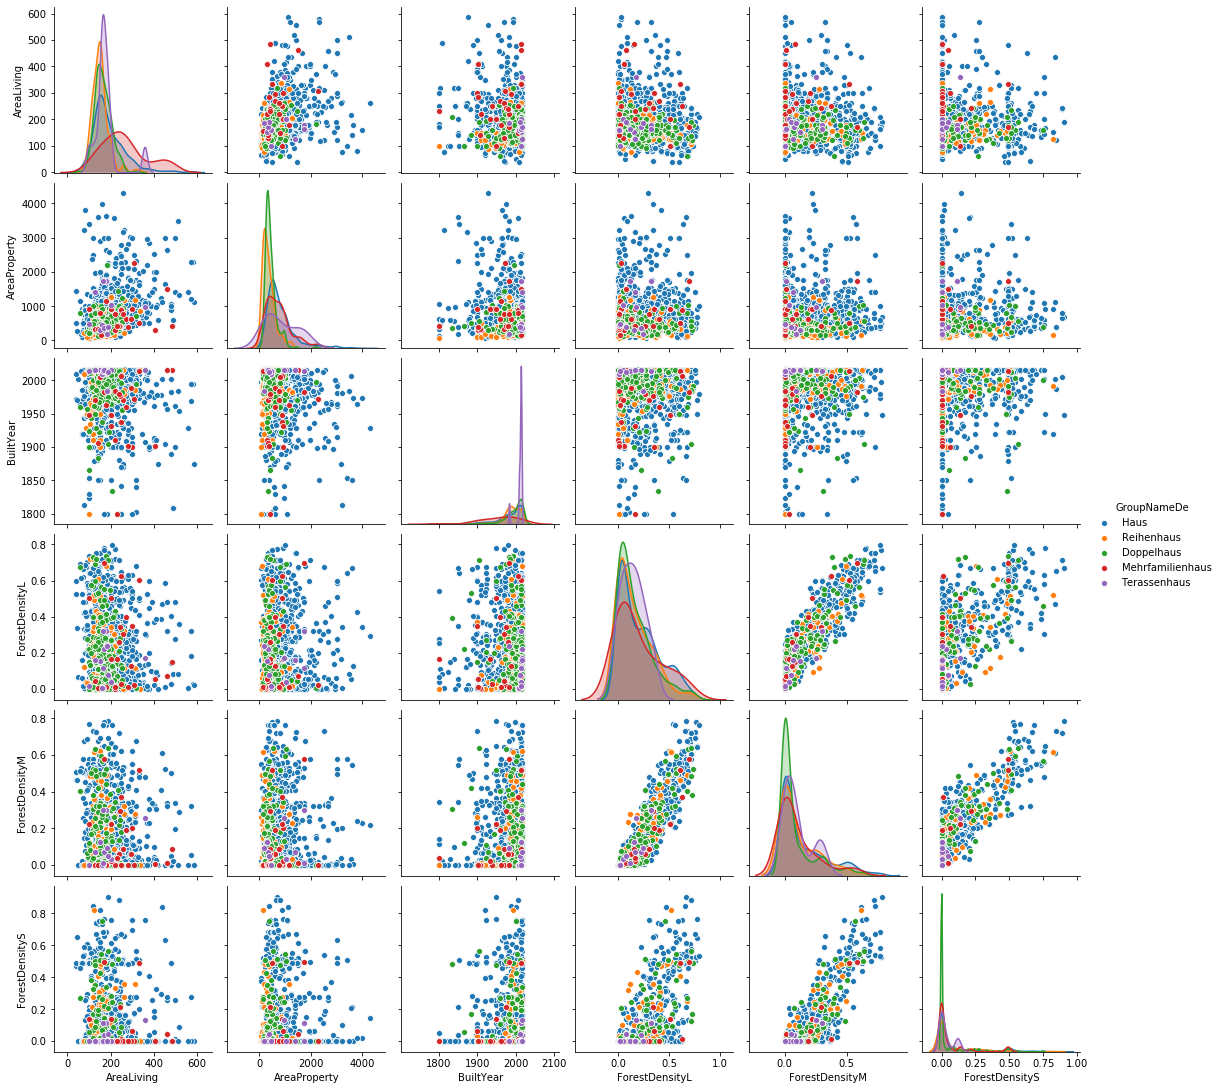

In [18]:
sns.pairplot(df.drop(df.columns[4], axis=1).iloc[:1500,1:8],hue="GroupNameDe")
plt.show()